In [1]:
import pandas as pd
import numpy as np
import nltk # Natural Language Toolkit 

In [2]:
messages = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Unsupervised\NLP\spam1.csv")

# Getting errors because we have different characters like chinese language, emojis,etc


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [5]:
messages = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Unsupervised\NLP\spam1.csv", encoding = 'cp1252')

In [6]:
messages.shape

(6776, 5)

In [7]:
messages.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [8]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [9]:
messages = messages.loc[ : , ['v1', 'v2']]

# getting rid of the column having huge nulls

In [10]:
messages.rename(columns= { 'v1': 'label', 'v2': 'message'}, inplace= True)

In [11]:
messages.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [13]:
messages.label.replace({'spam': 1, 'ham': 0}, inplace= True)

In [14]:
messages.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

In [15]:
messages.message

# Some words in uppercase and some in lowercase and we will change into either one 

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
6771    This is the 2nd time we have tried 2 contact u...
6772                Will Ì_ b going to esplanade fr home?
6773    Pity, * was in mood for that. So...any other s...
6774    The guy did some bitching but I acted like i'd...
6775                           Rofl. Its true to its name
Name: message, Length: 6776, dtype: object

In [16]:
messages.message = messages.message.str.lower()

In [17]:
messages.message

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
6771    this is the 2nd time we have tried 2 contact u...
6772                will ì_ b going to esplanade fr home?
6773    pity, * was in mood for that. so...any other s...
6774    the guy did some bitching but i acted like i'd...
6775                           rofl. its true to its name
Name: message, Length: 6776, dtype: object

In [18]:
from nltk.corpus import stopwords



In [19]:
# if error is showing in the above line, run the below code
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RahulK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords.words('english')

# If you get error here run the below command
# nltk.download('stopwords')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
len(stopwords.words('english'))

179

In [22]:
import string

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# I wish to remove punctuations and stopwords from the corpus as they add no meaning/importance in the document

# Till here we have only seen the stopwords and punctuation but did not remove it yet

In [25]:
# Performing an example to understand user defined function we will create later

exm_list = [3,10,20,40,50,2]
user_list = [9,3,20,50,100]

In [26]:
for i in user_list:
    if i not in exm_list:
        print('This is not in exm_list', i)

This is not in exm_list 9
This is not in exm_list 100


In [27]:
for i in user_list:
    if i in exm_list:
        print('This is in exm_list', i)

This is in exm_list 3
This is in exm_list 20
This is in exm_list 50


In [28]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words('english')]

In [29]:
messages.message.apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# TDM:  I need count of each and every word

# CountVectorizer is used to get the count of each unique word

# count is needed after removing punctuations and stop words

In [31]:
import time

start = time.time()

bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

end = time.time()

print(end-start)

# We are doing this to check the amount of time taken

20.64823341369629


In [32]:
# Let us reduce the time process
type(stopwords.words('english'))

# Everytime whenever we run this function, it will call data from the storage and hence take some time
# we will store this data in a list, so we do not have to invoke the function everytime

list

In [33]:
l1 = stopwords.words('english')

In [34]:
def text_process1(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in l1]

In [35]:
import time

start = time.time()

bow_transformer = CountVectorizer(analyzer = text_process1).fit(messages['message'])

end = time.time()

print(end-start)

0.318469762802124


In [36]:
# We saw the time reduced down to .31 sec from 20 sec

In [37]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [38]:
len(bow_transformer.vocabulary_)

# 9422 unique words
# TDM will have 9422 columns

9422

In [39]:
tdm = bow_transformer.transform(messages['message'])

In [40]:
tdm.shape

(6776, 9422)

In [41]:
type(tdm)

scipy.sparse.csr.csr_matrix

In [42]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
# This TDM will act as my x(independent) and messages.label column will be my y(dependent)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(tdm, messages.label, test_size= .2)

In [46]:
print(x_train.shape)
print(y_train.shape)
print('------')
print(x_test.shape)
print(y_test.shape)

# Just to check the records

(5420, 9422)
(5420,)
------
(1356, 9422)
(1356,)


In [47]:
from sklearn.naive_bayes import MultinomialNB

# Classification model

In [48]:
nb_model = MultinomialNB()

In [49]:
nb_model.fit(x_train,y_train)

MultinomialNB()

In [50]:
pred = nb_model.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
tab = confusion_matrix(y_test, pred)

In [53]:
tab

array([[1134,   21],
       [  12,  189]], dtype=int64)

In [54]:
tab.diagonal().sum() * 100 / tab.sum()

97.56637168141593

In [55]:
# for trying at home, create model using logistic , decision tree, rf & see which is best

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
linreg = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [58]:
linreg.fit(x_train, y_train)

LogisticRegression()

In [59]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
pred_linreg = linreg.predict(x_test)

In [62]:
pred_dt = dt.predict(x_test)

In [63]:
pred_rfc = rfc.predict(x_test)

In [64]:
tab_linreg = confusion_matrix(y_test, pred_linreg)
tab_dt = confusion_matrix(y_test, pred_dt)
tab_rfc = confusion_matrix(y_test, pred_rfc)

In [65]:
tab_linreg

array([[1155,    0],
       [  23,  178]], dtype=int64)

In [66]:
tab_dt

array([[1148,    7],
       [  25,  176]], dtype=int64)

In [67]:
tab_rfc

array([[1155,    0],
       [  29,  172]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print('Accuracy from Logistic -- >', accuracy_score(y_test, pred_linreg))
print('Accuracy from DT -- >', accuracy_score(y_test, pred_dt))
print('Accuracy from Random Forest -- >', accuracy_score(y_test, pred_rfc))

Accuracy from Logistic -- > 0.9830383480825958
Accuracy from DT -- > 0.976401179941003
Accuracy from Random Forest -- > 0.9786135693215339


In [3]:
l1 = ['a','b','e','f' ] # base list

l2 = ['z','x','f','a']

# I want to check each word from l2 and see if present in l1

In [4]:
for word in l2:
    if word in l1:
        print('word present', word)

word present f
word present a


In [5]:
for word in l2:
    if word not in l1:
        print('word not present', word)

word not present z
word not present x


# Lets plot a word cloud

In [73]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
from wordcloud import WordCloud

In [71]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(messages['message']))

In [72]:
import matplotlib.pyplot as plt

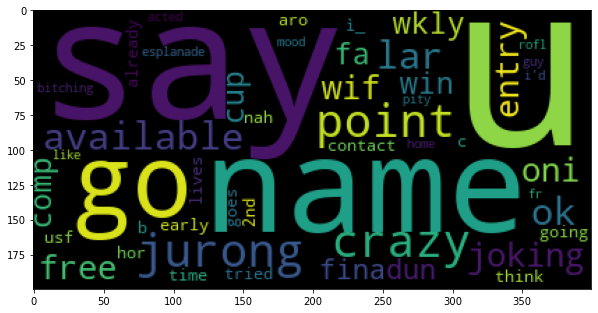

In [73]:
plt.figure(figsize=(10,10))
plt.imshow(cloud)


# Everytime we run this code, the positions of the words will change
# However, the words and their size will still remain the same

In [81]:
bow_transformer.max_features()

TypeError: 'NoneType' object is not callable

In [82]:
# Now we will make separate wordcloud for ham and spam emails

ham_email = messages[messages.label == 0]
spam_email = messages[messages.label == 1]


In [83]:
ham_email.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
6,0,even my brother is not like to speak with me. ...


In [84]:
spam_email.head()

,label,message
2,1,free entry in 2 a wkly comp to win fa cup fina...
5,1,freemsg hey there darling it's been 3 week's n...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...
11,1,"six chances to win cash! from 100 to 20,000 po..."


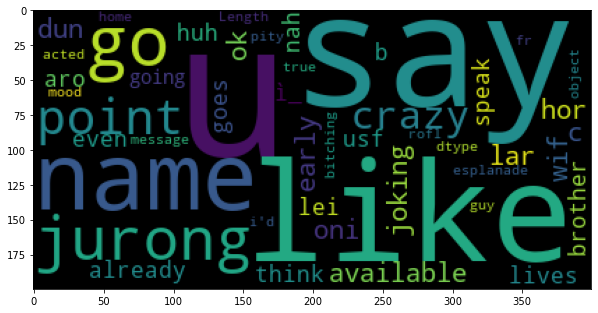

In [85]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(ham_email['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)


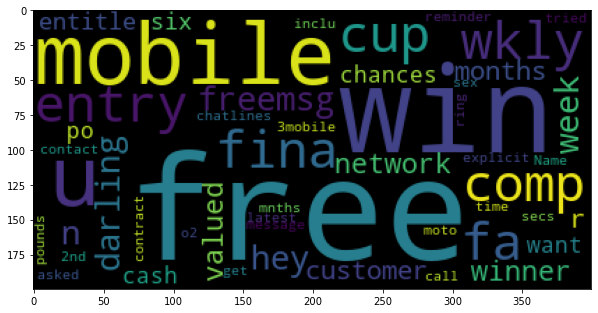

In [86]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(spam_email['message']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)